# Loan Repayment Prediction
---

## Context
LendingClub is an American peer-to-peer lending company headquartered in San Francisco, California. It was the first peer-to-peer lending company to register its offerings with the U.S. Securities and Exchange Commission and offer secondary market trading of loans. 

LendingClub is the world's largest peer-to-peer lending platform.

**Main goal:** Having historical data on loans issued with information on whether the borrower defaulted (write-offs), we need to build a model that can predict whether the borrower will repay his loan or not.

Thus, in the future, when we receive a new potential client, we will be able to assess whether they will be able to repay the loan.

---

## Dataset
Dataset characteristics and their explanation:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan.</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade.</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade.</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER.</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified.</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded.</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan.</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower.</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened.</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records.</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance.</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F.</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers.</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies.</td>
    </tr>
  </tbody>
</table>

---

## Load Data

Import of libraries for working with data and its visualization:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
%matplotlib inline

Write a function that will provide the ability to get information about the selected column:

In [2]:
data_info = pd.read_csv('data/lending_club_info.csv', index_col='LoanStatNew')

In [3]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [4]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


Import and check the data:

In [5]:
df = pd.read_csv('data/lending_club_data.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

---

## Data Visualization

First, let's try to find a relationship in the original data using correlation:

<AxesSubplot: >

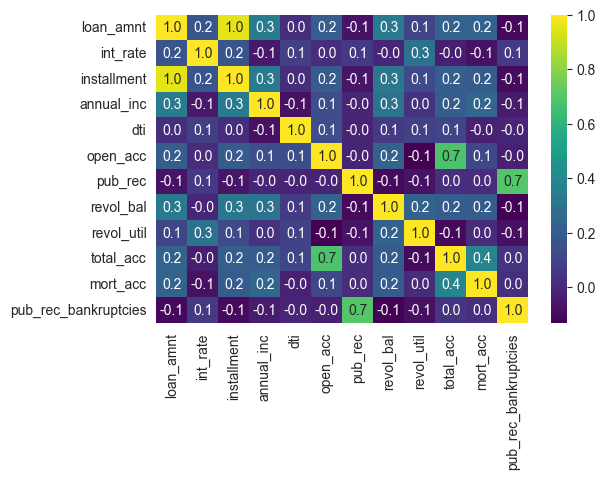

In [7]:
plt.figure(figsize=(6, 4))
sns.heatmap(data= df.corr(), annot=True, fmt=".1f", cmap='viridis')

- What you can immediately notice is the direct relationship. The direct relationship between the loan amount and the installment is explained by the fact that the monthly payment is proportional to the amount of the original loan.

Let's look at how the values in our label are distributed:

<AxesSubplot: xlabel='count', ylabel='loan_status'>

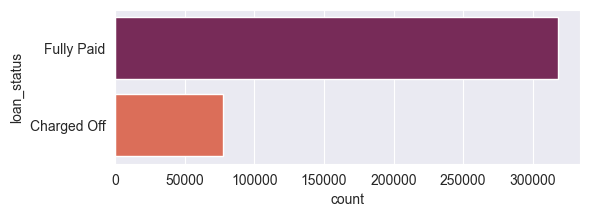

In [8]:
plt.figure(figsize=(6, 2))
sns.countplot(data=df, y=df['loan_status'], palette='rocket')

- One of the key problems with this data set is that it is **unbalanced**. In the graph, we see that the number of people who have repaid their loans far exceeds the number of people who have not.

It is also important to pay attention to the amount of loans people have taken out:

<AxesSubplot: xlabel='loan_amnt', ylabel='Count'>

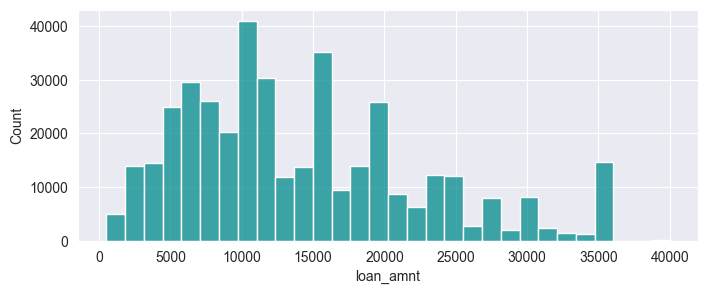

In [9]:
plt.figure(figsize=(8, 3))
sns.histplot(data=df, x=df['loan_amnt'], bins=30, color='darkcyan')

- Despite some exceptions, the average amount ranges from 13 to 15 thousand dollars.

Create a boxplot showing the relationship between the loan_status and the loan_amnt:

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

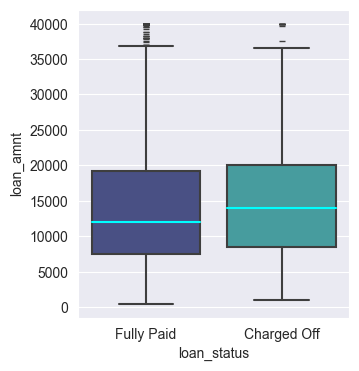

In [10]:
plt.figure(figsize=(3.5, 4))
sns.boxplot(data=df, x='loan_status', y='loan_amnt',
            flierprops={"marker": "_"}, 
            palette='mako',medianprops={"color": "cyan"})

Calculate the summary statistics for the loan amount, grouped by the loan_status:

In [11]:
df['loan_amnt'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans:

In [12]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [13]:
sorted(df['sub_grade'].unique())[:10]

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5']

Create a countplot per grade with hue to the loan_status label:

<AxesSubplot: xlabel='grade', ylabel='count'>

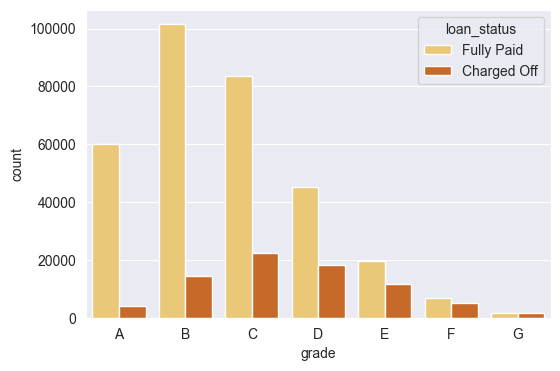

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=df['grade'].sort_values(), 
              hue=df['loan_status'], palette='YlOrBr')

Create a countplot per sub_grade with and without hue to the loan_status label:

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

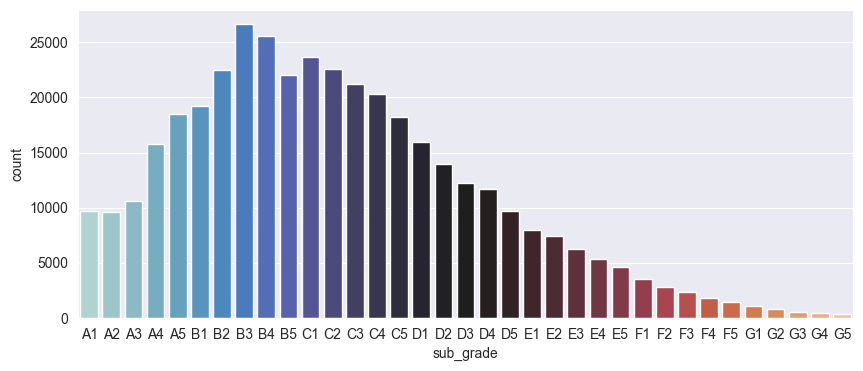

In [15]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x=df['sub_grade'].sort_values(), palette='icefire')

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

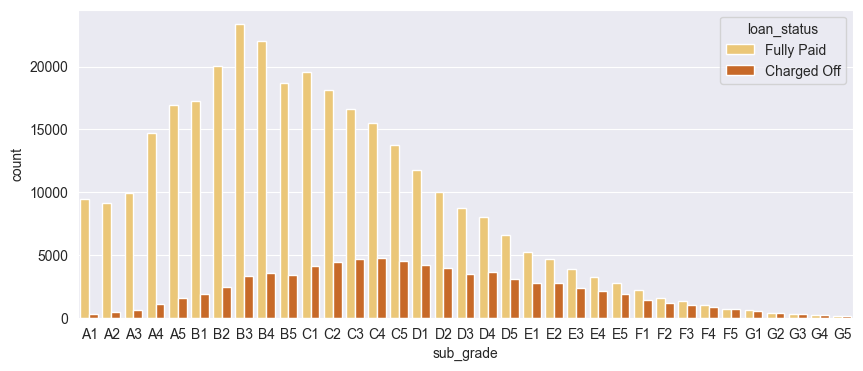

In [16]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x=df['sub_grade'].sort_values(), palette='YlOrBr', hue=df['loan_status'])

- That is, the higher the score issued by the company, the more likely a person is to repay the loan.

It looks like F and G subgrades don't get paid back that often. Plot a graph that only covers this area:

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

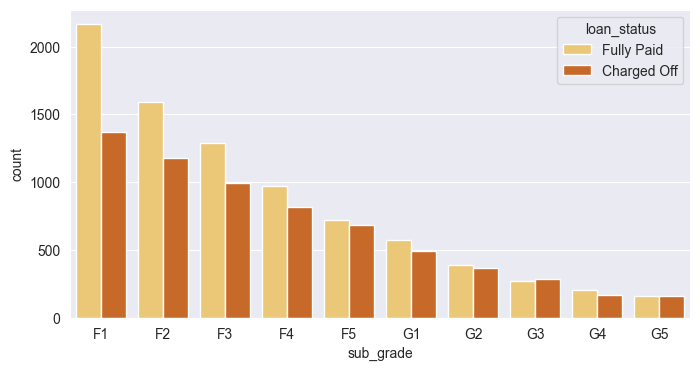

In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=df['sub_grade'].sort_values()[df['sub_grade'] > 'E5'], 
              palette='YlOrBr', hue=df['loan_status'])

Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"

In [18]:
def repaid(row):
    if row == 'Fully Paid':
        return 1
    else: return 0

In [19]:
df['loan_repaid'] = df['loan_status'].apply(repaid)
df[['loan_repaid', 'loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.

<AxesSubplot: >

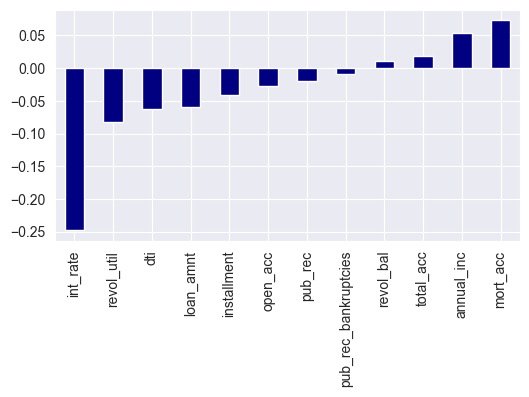

In [20]:
plt.figure(figsize=(6, 3))
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar', color='navy')

- This graph shows that the mort_acc column, i.e. the number of mortgage accounts held by the client, has the greatest impact.

---
## Data PreProcessing

Task: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [21]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


### Missing Data

Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.

Create a Series that displays the total count of missing values per column:

In [22]:
missing_values = df.isna().sum()
missing_values.where(missing_values != 0).dropna()

emp_title               22927.0
emp_length              18301.0
title                    1755.0
revol_util                276.0
mort_acc                37795.0
pub_rec_bankruptcies      535.0
dtype: float64

Convert this Series to be in term of percentage of the total DataFrame:

In [23]:
missing_values.apply(lambda x: x / len(df) * 100).where(missing_values != 0).dropna()

emp_title               5.789208
emp_length              4.621115
title                   0.443148
revol_util              0.069692
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
dtype: float64

Let's examine emp_title and emp_length to see whether it will be okay to drop them:

In [24]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


How many unique employment job titles are there?

In [25]:
print(df['emp_title'].nunique())
df['emp_title'].value_counts()

173105


Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

- Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [26]:
df.drop('emp_title', axis=1, inplace=True)

Create a count plot of the emp_length feature column:

<AxesSubplot: xlabel='emp_length', ylabel='count'>

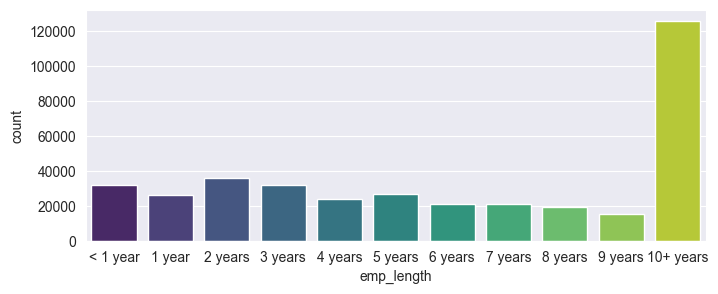

In [27]:
emp_length_order = sorted(df['emp_length'].dropna().unique())
emp_length_order = [emp_length_order[-1]] + emp_length_order[:-1]
emp_length_order = emp_length_order[:2] + emp_length_order[3:] + [emp_length_order[2]]

plt.figure(figsize=(8, 3))
sns.countplot(data=df, x=df['emp_length'], order=emp_length_order, palette='viridis')

Plot out the countplot with a hue separating Fully Paid vs Charged Off:

<AxesSubplot: xlabel='emp_length', ylabel='count'>

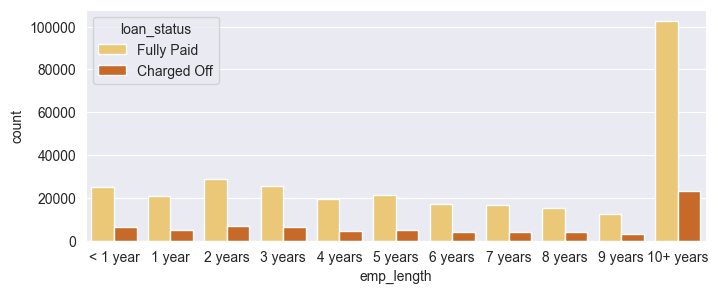

In [28]:
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x=df['emp_length'], hue=df['loan_status'], 
              order=emp_length_order, palette='YlOrBr')

- This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.

So let's find this percentage using the function:

In [29]:
def rel_emp_length_and_loan_repaid():
    return (df[df['loan_status'] == 'Charged Off'].groupby(df['emp_length']).count() / \
    df[df['loan_status'] == 'Fully Paid'].groupby(df['emp_length']).count())['emp_length']

In [30]:
s1 = rel_emp_length_and_loan_repaid()
s1

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: emp_length, dtype: float64

<AxesSubplot: xlabel='emp_length'>

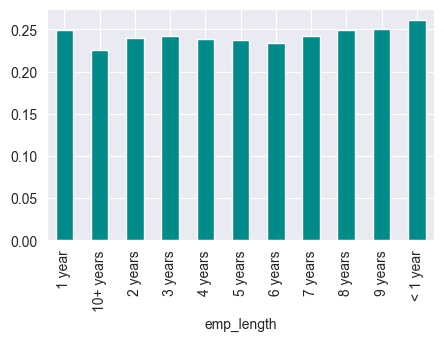

In [31]:
plt.figure(figsize=(5, 3))
s1.plot(kind='bar', color='darkcyan')

- Charge off rates are extremely similar across all employment lengths. Therefore, we drop this column.

In [32]:
df.drop('emp_length', axis=1, inplace=True)

In [33]:
missing_values = df.isna().sum()
missing_values.where(missing_values != 0).dropna()

title                    1755.0
revol_util                276.0
mort_acc                37795.0
pub_rec_bankruptcies      535.0
dtype: float64

Review the title column and the purpose column. Check for duplicate values in the columns:

In [34]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [35]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

- The title column is simply a string subcategory/description of the purpose column. Therefore, we drop this column.

In [36]:
df.drop('title', axis=1, inplace=True)

Find out what the mort_acc feature represents:

In [37]:
feat_info('mort_acc')

Number of mortgage accounts.


Create a value_counts of the mort_acc column:

In [38]:
df['mort_acc'].value_counts()[:10]

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
Name: mort_acc, dtype: int64

There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. Let's review the other columsn to see which most highly correlates to mort_acc:

In [39]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry:

In [40]:
mean_total_acc = df.groupby(df['total_acc']).mean()['mort_acc']
mean_total_acc[:10]

total_acc
2.0     0.000000
3.0     0.052023
4.0     0.066743
5.0     0.103289
6.0     0.151293
7.0     0.221695
8.0     0.308422
9.0     0.365499
10.0    0.429158
Name: mort_acc, dtype: float64

In [41]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return mean_total_acc[total_acc]
    else:
        return mort_acc
    

In [42]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

Let's see what values are left:

In [43]:
missing_values = df.isna().sum()
missing_values.where(missing_values != 0).dropna()

revol_util              276.0
pub_rec_bankruptcies    535.0
dtype: float64

- Columns revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Therefore, we drop this values.

In [44]:
df.dropna(axis=1, inplace=True)

Let's see if there's any missing data:

In [45]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

- There are no missing values.

### Categorical Variables and Dummy Variables

Now we just need to deal with the string values due to the categorical columns.

List all the columns that are currently non-numeric:

In [46]:
df.select_dtypes(include = 'object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

Next, we will parse and transform the data.

**term**

In [47]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [48]:
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))
df['term'].value_counts()

36    302005
60     94025
Name: term, dtype: int64

**grade**

In [49]:
df.drop('grade', axis=1, inplace=True)

**sub_grade**

In [50]:
dummy_grades = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df, dummy_grades], axis=1)
df.drop('sub_grade', axis=1, inplace=True)

**verification_status, application_type, initial_list_status, purpose**

In [51]:
dummy_variables = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)
df = pd.concat([df, dummy_variables], axis=1)
df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1, inplace=True)

**home_ownership**

In [52]:
feat_info('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER.


In [53]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [54]:
df.replace('NONE', 'OTHER', inplace=True)
df.replace('ANY', 'OTHER', inplace=True)

df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [55]:
dummy_ownership = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df, dummy_ownership], axis=1)
df.drop('home_ownership', axis=1, inplace=True)

**address**

In [56]:
df['zip_code'] = df['address'].apply(lambda x: str(x)[-5:])
df['zip_code'].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: zip_code, dtype: int64

In [57]:
dummy_zip = pd.get_dummies(df['zip_code'], drop_first=True)
df = pd.concat([df, dummy_zip], axis=1)
df.drop(['zip_code', 'address'], axis=1, inplace=True)

**issue_d**

In [58]:
df = df.drop('issue_d',axis=1)

**earliest_cr_line**

In [59]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))
df['earliest_cr_year'].value_counts()

2000    29366
2001    29083
1999    26491
2002    25901
2003    23657
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_year, Length: 65, dtype: int64

In [60]:
df.drop('earliest_cr_line', axis=1, inplace=True)

That's it, we're done processing the data.

In [61]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,0,1,0,0,0,0,0,0,0,1999


---
## Splitting Data

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
df.drop('loan_status', axis=1, inplace=True)

In [64]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

#df = df.sample(frac=0.1,random_state=101)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

---
## Creating & Training Models

In [66]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

I use pipelines and loop to find the optimal method to scale the data and train the machine model.

In [67]:
scalers = [MinMaxScaler(), StandardScaler(), MaxAbsScaler()]
models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier()]

for scaler in scalers:
    for model in models:
        pipe = Pipeline([('scaler', scaler), ('model', model)])
        pipe.fit(X_train, y_train)
        print(f'{model} -> {scaler} -> Score: {pipe.score(X_test, y_test)}')

LogisticRegression() -> MinMaxScaler() -> Score: 0.8890235588213015
DecisionTreeClassifier() -> MinMaxScaler() -> Score: 0.831250157816327
KNeighborsClassifier() -> MinMaxScaler() -> Score: 0.8662811739851358
RandomForestClassifier() -> MinMaxScaler() -> Score: 0.8896043229048305
LogisticRegression() -> StandardScaler() -> Score: 0.8896295735171578
DecisionTreeClassifier() -> StandardScaler() -> Score: 0.8314689964564974
KNeighborsClassifier() -> StandardScaler() -> Score: 0.8712555446136235
RandomForestClassifier() -> StandardScaler() -> Score: 0.8899157471235344
LogisticRegression() -> MaxAbsScaler() -> Score: 0.8889478069843194
DecisionTreeClassifier() -> MaxAbsScaler() -> Score: 0.8314942470688248
KNeighborsClassifier() -> MaxAbsScaler() -> Score: 0.866079169086517
RandomForestClassifier() -> MaxAbsScaler() -> Score: 0.8897810771911219


- After going through a lot of training, StandardScaler() turned out to be the best method for scaling data.

In [68]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest Model

In [69]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

predictions = rfc.predict(X_test)

rfc.score(X_test, y_test)

0.8892423974614718

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     23260
           1       0.88      0.99      0.94     95549

    accuracy                           0.89    118809
   macro avg       0.92      0.73      0.78    118809
weighted avg       0.90      0.89      0.87    118809



<AxesSubplot: >

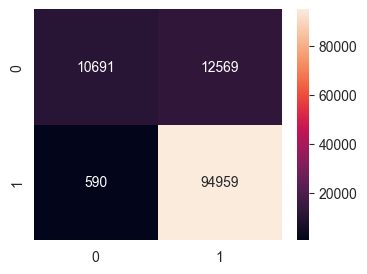

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
plt.figure(figsize=(4,3))
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt = '.0f')

### ANN Model

In [71]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

We use a callback to prevent overfitting model training:

In [72]:
early_stop = EarlyStopping(patience=10, 
                           min_delta=0.001, 
                           restore_best_weights=True)

Structure of the model:

In [73]:
model = Sequential()

model.add(Dense(77, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

ANN model training:

In [74]:
model.fit(x = X_train, y=y_train, 
          batch_size= 256, epochs=30, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stop])

Epoch 1/30
1083/1083 [==============================] - 3s 2ms/step - loss: 0.3071 - val_loss: 0.2619
Epoch 2/30
1083/1083 [==============================] - 3s 2ms/step - loss: 0.2674 - val_loss: 0.2615
Epoch 3/30
1083/1083 [==============================] - 3s 3ms/step - loss: 0.2647 - val_loss: 0.2598
Epoch 4/30
1083/1083 [==============================] - 3s 3ms/step - loss: 0.2632 - val_loss: 0.2595
Epoch 5/30
1083/1083 [==============================] - 3s 2ms/step - loss: 0.2622 - val_loss: 0.2596
Epoch 6/30
1083/1083 [==============================] - 3s 2ms/step - loss: 0.2618 - val_loss: 0.2591
Epoch 7/30
1083/1083 [==============================] - 3s 2ms/step - loss: 0.2615 - val_loss: 0.2593
Epoch 8/30
1083/1083 [==============================] - 3s 2ms/step - loss: 0.2614 - val_loss: 0.2591
Epoch 9/30
1083/1083 [==============================] - 2s 2ms/step - loss: 0.2607 - val_loss: 0.2589
Epoch 10/30
1083/1083 [==============================] - 3s 2ms/step - loss: 0.260

Let's display exactly how the losses have changed with each epoch.

<AxesSubplot: >

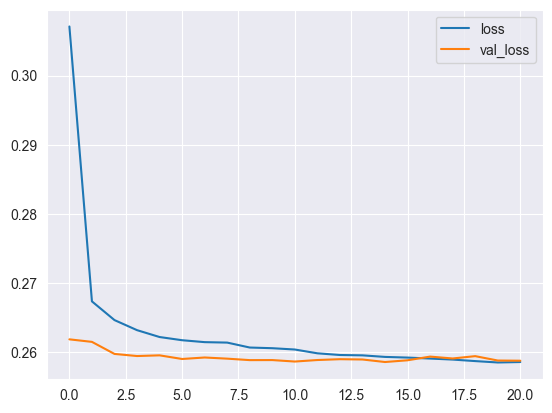

In [75]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()

Now let's test the model:

In [76]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

3713/3713 [==============================] - 3s 683us/step


              precision    recall  f1-score   support

           0       0.99      0.44      0.61     23260
           1       0.88      1.00      0.94     95549

    accuracy                           0.89    118809
   macro avg       0.93      0.72      0.77    118809
weighted avg       0.90      0.89      0.87    118809



<AxesSubplot: >

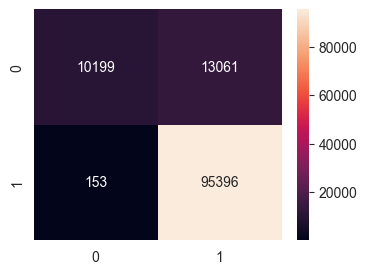

In [77]:
print(classification_report(y_test, predictions))
plt.figure(figsize=(4,3))
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt = '.0f')

---
## Results

Let's test the model on a pointwise selected sample:

In [78]:
import random

random_ind = random.randint(0, len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]

(model.predict(new_customer.values.reshape(1,76)) > 0.5).astype('int32')

1/1 [==============================] - 0s 37ms/step


array([[1]])

In [79]:
df.iloc[random_ind]['loan_repaid']

1.0

**As we can see, the results of the algorithm are almost identical and at the same time not very good. There are several reasons for this, the main one being the unbalanced dataset, where the number of people who repaid the loan to those who did not is 4:1.**
**Also, I cannot but underline that I worked with basic algorithms and their standard parameters.**

But, objectively the best model is saved and presented below:

In [81]:
from joblib import dump

dump(model, 'ann_model.sav')

['ann_model.sav']